### Integrantes:


*   Raquel Zumba
*   Kevin Maldonado



# 1 Introducción

### Importar las librerias

In [19]:
import tensorflow as tf
from keras import layers, models, optimizers, regularizers, Model, Input
from tensorflow.keras.callbacks import ReduceLROnPlateau
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import itertools
import random
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.neighbors import NearestNeighbors


In [132]:
pip install --upgrade scikit-learn


   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.2/11.0 MB 6.9 MB/s eta 0:00:02
   --- ------------------------------------ 0.9/11.0 MB 13.7 MB/s eta 0:00:01
   ------- -------------------------------- 2.0/11.0 MB 15.6 MB/s eta 0:00:01
   ----------- ---------------------------- 3.2/11.0 MB 18.8 MB/s eta 0:00:01
   ---------------- ----------------------- 4.6/11.0 MB 22.7 MB/s eta 0:00:01
   --------------------- ------------------ 6.0/11.0 MB 22.5 MB/s eta 0:00:01
   -------------------------- ------------- 7.3/11.0 MB 23.3 MB/s eta 0:00:01
   ------------------------------- -------- 8.6/11.0 MB 25.0 MB/s eta 0:00:01
   ----------------------------------- ---- 9.8/11.0 MB 25.2 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.0 MB 27.3 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 25.2 MB/s eta 0:00:00
  Attempting uninstall: threadpoolctl
    Found existing installation: 


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# 2.1  Adquisición de datos
Objetivo: Obtener y preparar el dataset Caltech101.

### Descargar el dataset

In [3]:
(train_dataset, test_dataset), dataset_info = tfds.load(
    # Nombre del dataset a cargar
    name='caltech101',
    # División del dataset: 80% para entrenamiento, 20% para prueba
    split=['train[:80%]', 'test[20%:]'],
    # Incluye información adicional del dataset
    with_info=True,
    as_supervised=True,
     # Directorio donde se guardará el dataset
     data_dir='C:\\RETRIVAL'
    #download=False
)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\RETRIVAL\caltech101\incomplete.IHNVDS_3.0.2\caltech101-train.tfrecord*...:   0%|          | 0/305…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\RETRIVAL\caltech101\incomplete.IHNVDS_3.0.2\caltech101-test.tfrecord*...:   0%|          | 0/6085…

Dataset caltech101 downloaded and prepared to C:\RETRIVAL\caltech101\3.0.2. Subsequent calls will reuse this data.


### Número de imagenes para el train y test.

In [5]:
# Contar el número de imágenes en el conjunto de entrenamiento
num_train_images = tf.data.experimental.cardinality(train_dataset).numpy()

# Contar el número de imágenes en el conjunto de prueba
num_test_images = tf.data.experimental.cardinality(test_dataset).numpy()

print(f'Número de imágenes en el conjunto de entrenamiento: {num_train_images}')
print(f'Número de imágenes en el conjunto de prueba: {num_test_images}')

Número de imágenes en el conjunto de entrenamiento: 2447
Número de imágenes en el conjunto de prueba: 4868


### Obtener el numero de clases

In [6]:
# Obtener el número de clases del conjunto de datos
num_classes = dataset_info.features['label'].num_classes
# Imprimir el número de clases
print(f'Número de clases en el dataset: {num_classes}')

Número de clases en el dataset: 102


### Mostrar las imagenes se tiene por cada clase
Se realizo estó para ver si la data es balanceada


In [7]:
# Inicializar un diccionario para contar el número de imágenes por clase
class_counts = {i: 0 for i in range(num_classes)}

# Contar las imágenes por clase en el conjunto de entrenamiento
for image, label in tfds.as_numpy(train_dataset):
    class_counts[label] += 1

# Contar las imágenes por clase en el conjunto de prueba
for image, label in tfds.as_numpy(test_dataset):
    class_counts[label] += 1

# Obtener los nombres de las clases
class_names = dataset_info.features['label'].int2str

# Imprimir el número de imágenes por clase
for class_id, count in class_counts.items():
    class_name = class_names(class_id)
    print(f'Clase: {class_name}, Número de imágenes: {count}')


Clase: accordion, Número de imágenes: 47
Clase: airplanes, Número de imágenes: 647
Clase: anchor, Número de imágenes: 32
Clase: ant, Número de imágenes: 36
Clase: background_google, Número de imágenes: 367
Clase: barrel, Número de imágenes: 34
Clase: bass, Número de imágenes: 46
Clase: beaver, Número de imágenes: 40
Clase: binocular, Número de imágenes: 28
Clase: bonsai, Número de imágenes: 106
Clase: brain, Número de imágenes: 76
Clase: brontosaurus, Número de imágenes: 36
Clase: buddha, Número de imágenes: 69
Clase: butterfly, Número de imágenes: 72
Clase: camera, Número de imágenes: 35
Clase: cannon, Número de imágenes: 38
Clase: car_side, Número de imágenes: 95
Clase: ceiling_fan, Número de imágenes: 36
Clase: cellphone, Número de imágenes: 47
Clase: chair, Número de imágenes: 46
Clase: chandelier, Número de imágenes: 87
Clase: cougar_body, Número de imágenes: 40
Clase: cougar_face, Número de imágenes: 58
Clase: crab, Número de imágenes: 60
Clase: crayfish, Número de imágenes: 59
C

# 2.2 Preprocesamiento

Objetivo: Preparar los datos para su análisis.

Usar técnicas de preprocesamiento de imágenes, como normalización, reducción de tamaño,
o eliminación de ruido.

### Preprocesar las imagenes del dataset

In [8]:
# Función que toma una imagen y una etiqueta como entrada
def preprocess_image(image, label):
  #Redimensiona cada imagen a un tamaño de 224x224 píxeles
    image = tf.image.resize(image, (224, 224))
    #Esta línea convierte los valores de los píxeles de la imagen de enteros de 0-255 a flotantes de 0-1
    image = tf.cast(image, tf.float32) / 255.0
    #Retorna la imagen y la etiqueta
    return image, label

### Preprocesamiento del conjunto de datos

### Train

In [9]:
# Aplica la función de preprocesamiento a cada imagen en el conjunto de datos de entrenamiento
train_dataset = train_dataset.map(preprocess_image).shuffle(1000).batch(32)

### Test

In [10]:
# Aplica la función de preprocesamiento a cada imagen en el conjunto de datos de prueba
test_dataset = test_dataset.map(preprocess_image).batch(32)

###  Verifica la forma de los datos después del preprocesamiento

In [11]:
# Verifica la forma de los datos después del preprocesamiento y `batch()`
for images, lbls in train_dataset.take(1):
    print("Preprocessed Train images shape:", images.shape)  # Esperado: (batch_size, 224, 224, 3)
    print("Preprocessed Train labels shape:", lbls.shape)    # Esperado: (batch_size, ...)

for images, lbls in test_dataset.take(1):
    print("Preprocessed Test images shape:", images.shape)  # Esperado: (batch_size, 224, 224, 3)
    print("Preprocessed Test labels shape:", lbls.shape)

Preprocessed Train images shape: (32, 224, 224, 3)
Preprocessed Train labels shape: (32,)
Preprocessed Test images shape: (32, 224, 224, 3)
Preprocessed Test labels shape: (32,)


# 2.3 Extracción de Características
Objetivo: Extraer las características de las imágenes en una forma que los algoritmos puedan
procesar.

### Carga del modelo Preentrenado
* Se carga el modelo VGG16 preentrenado con los pesos de ImageNet. La opción include_top=False indica que no se incluirá la capa superior de clasificación del modelo original, permitiendo así usar el modelo solo para la extracción de características.
* La forma de entrada de las imágenes se establece en 224x224 píxeles con 3
canales de color (RGB).

In [12]:
# Load the VGG16 model with pretrained weights from ImageNet, without the top classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

#Crea un nuevo modelo que genere los mapas de características.
model = Model(inputs=base_model.input, outputs=base_model.layers[-1].output)

### Función para extraer caractericticas


*   Se utliza el modelo para extraer las caracteristicas de las imagenes
*   Agrega las caracteristicas y las etiquetas a la lista



In [13]:
# Función para extraer características del conjunto de datos
def extract_features(dataset):
    # Inicializa listas vacías para almacenar características, etiquetas e imágenes
    features = []  # Lista para almacenar los mapas de características extraídos de cada imagen
    labels = []    # Lista para almacenar las etiquetas correspondientes a cada imagen
    imgs = []    # Lista para almacenar las imágenes originales
    # Itera sobre cada par de imágenes y etiquetas en el conjunto de datos
    for images, lbls in dataset:
        imgs.append(images)  # Agrega las imágenes a la lista imgs
        # Utiliza el modelo para predecir las características de las imágenes
        feature_maps = model.predict(images)
        features.append(feature_maps)  # Agrega los mapas de características a la lista features
        labels.append(lbls.numpy())     # Convierte las etiquetas a un formato numpy y las agrega a la lista labels

    # Devuelve las listas de características, etiquetas e imágenes
    return features, labels, imgs



### Extracción  de las caracteristicas del conjunto de prueba y entrenamiento

In [14]:
# Extraer características para los conjuntos de datos de entrenamiento y prueba
train_features, train_labels,train_img = extract_features(train_dataset)
test_features, test_labels,test_img = extract_features(test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 

### Funcion para guardar datos

# 2.4. Indexación
Objetivo: Crear un índice que permita búsquedas eficientes.

### Aplanar los mapas de características y convierte en vectores de características.

In [15]:
import numpy as np

# Asumiendo que ya has extraído las características, etiquetas e imágenes para entrenamiento y prueba
# train_features, train_labels, train_imgs = extract_features(train_dataset)
# test_features, test_labels, test_imgs = extract_features(test_dataset)

# Aplanar los mapas de características para el conjunto de entrenamiento
train_features_flat = np.array([feature.flatten() for batch in train_features for feature in batch])
train_labels_flat = np.array([label for batch in train_labels for label in batch])
train_img_flat = np.array([img.numpy().flatten() for batch in train_img for img in batch])

# Aplanar los mapas de características para el conjunto de prueba
test_features_flat = np.array([feature.flatten() for batch in test_features for feature in batch])
test_labels_flat = np.array([label for batch in test_labels for label in batch])
test_img_flat = np.array([img.numpy().flatten() for batch in test_img for img in batch])


### Guardar las  características, etiquetas e imágenes aplanadas para el conjunto de entrenamiento y prueba

In [16]:
# Guardar las características, etiquetas e imágenes aplanadas para el conjunto de entrenamiento
np.save('train_features.npy', train_features_flat)
np.save('train_labels.npy', train_labels_flat)
np.save('train_imgs.npy', train_img_flat)

# Guardar las características, etiquetas e imágenes aplanadas para el conjunto de prueba
np.save('test_features.npy', test_features_flat)
np.save('test_labels.npy', test_labels_flat)
np.save('test_imgs.npy', test_img_flat)

print("Las características, etiquetas e imágenes aplanadas han sido guardadas correctamente.")


Las características, etiquetas e imágenes aplanadas han sido guardadas correctamente.


### Cargar las características, etiquetas e imágenes aplanadas para el conjunto de entrenamiento

In [17]:


# Cargar las características, etiquetas e imágenes aplanadas para el conjunto de entrenamiento
train_features_flat = np.load('train_features.npy')
train_labels_flat = np.load('train_labels.npy')
train_imgs_flat = np.load('train_imgs.npy')

# Cargar las características, etiquetas e imágenes aplanadas para el conjunto de prueba
test_features_flat = np.load('test_features.npy')
test_labels_flat = np.load('test_labels.npy')
test_imgs_flat = np.load('test_imgs.npy')

# Verificar las dimensiones de los datos cargados
print(f"Características de entrenamiento cargadas: {train_features_flat.shape}")
print(f"Etiquetas de entrenamiento cargadas: {train_labels_flat.shape}")
print(f"Imágenes de entrenamiento cargadas: {train_imgs_flat.shape}")

print(f"Características de prueba cargadas: {test_features_flat.shape}")
print(f"Etiquetas de prueba cargadas: {test_labels_flat.shape}")
print(f"Imágenes de prueba cargadas: {test_imgs_flat.shape}")


Características de entrenamiento cargadas: (2447, 25088)
Etiquetas de entrenamiento cargadas: (2447,)
Imágenes de entrenamiento cargadas: (2447, 150528)
Características de prueba cargadas: (4868, 25088)
Etiquetas de prueba cargadas: (4868,)
Imágenes de prueba cargadas: (4868, 150528)


### 2.5 Motor de bùsqueda

### Obtener las características y la imagen de consulta

In [230]:
# Seleccionar la imagen con índice 10
query_index = 20

# Obtener las características y la imagen de consulta
query_features = test_features_flat[query_index]
query_img = test_imgs_flat[query_index]

# Redimensionar las características de la imagen de consulta para la búsqueda
query_features = query_features.reshape(1, -1)

# Encontrar los vecinos más cercanos en el conjunto de prueba
from sklearn.neighbors import NearestNeighbors
nn_model = NearestNeighbors(n_neighbors=30, algorithm='ball_tree').fit(test_features_flat)
##nn_model = NearestNeighbors(n_neighbors=5, algorithm='brute').fit(train_features_flat)

distances, indices = nn_model.kneighbors(query_features)

### Resultados de los indices y las distancias similares

In [231]:
# Imprimir resultados
print(f"Índice de la imagen de consulta en el conjunto de prueba: {query_index}")
print("Índices de las imágenes más similares:", indices)
print("Distancias de las imágenes más similares:", distances)

Índice de la imagen de consulta en el conjunto de prueba: 20
Índices de las imágenes más similares: [[  20  198 3774  105 1067 1217 1575  888 1781 2372 3694 1963 1813 2862
  3769 3209 4011 1102 1939  794 4505 3824 3143 3374 2330  111 4260  580
  2475 2634]]
Distancias de las imágenes más similares: [[ 0.         47.06486654 47.45623185 47.48066151 47.55232785 47.6301585
  47.63235462 47.72905367 47.89457563 47.92220208 47.97043014 48.28540277
  48.46120367 48.56563782 48.69989877 48.71202018 48.71433201 48.73888785
  48.76238586 48.76306303 48.7869779  48.81565309 48.86622882 48.87015028
  48.87883677 48.89114128 48.92201491 48.9548594  48.97377255 49.04887638]]


### Mostrar la imagen de consulta


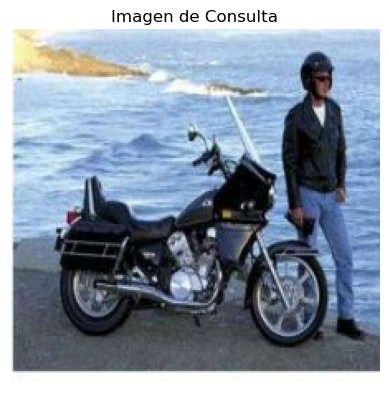

In [232]:
# Mostrar la imagen de consulta
query_img_display = query_img.reshape((224, 224, 3))  # Ajusta el reshape según el tamaño original
plt.imshow(query_img_display)
plt.title("Imagen de Consulta")
plt.axis('off')
plt.show()


### Mostrar las imágenes similares encontradas

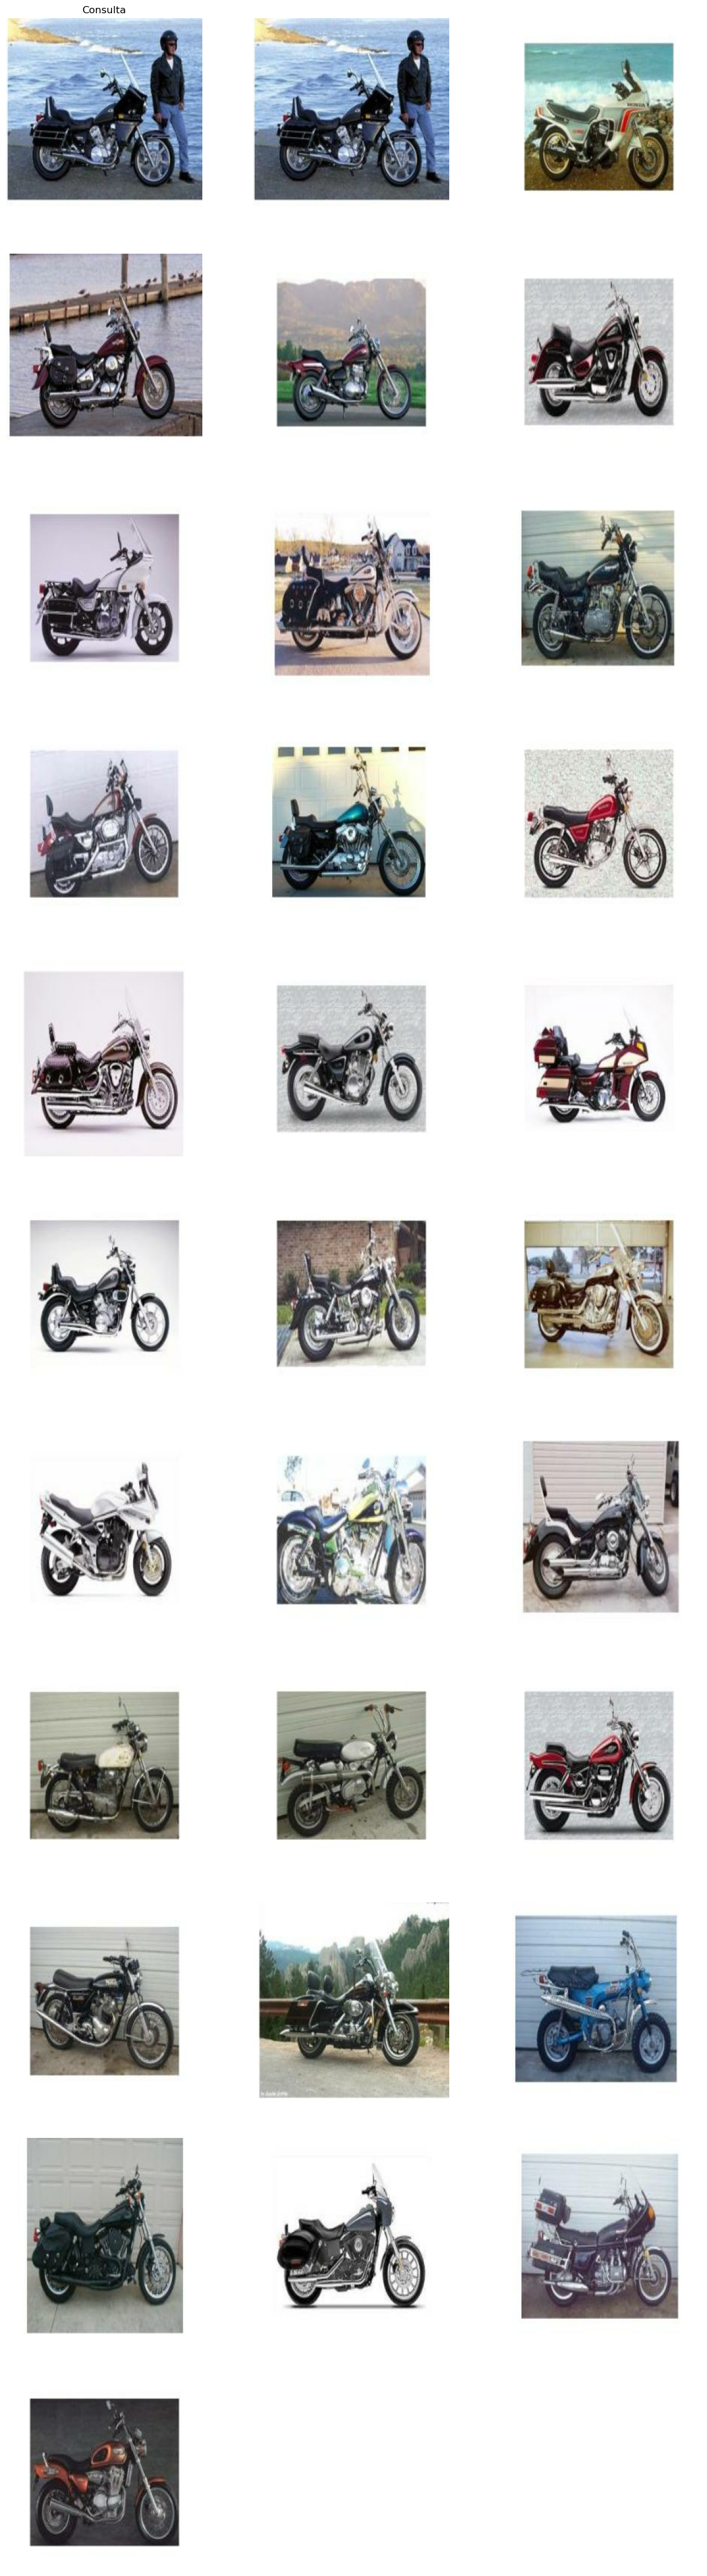

In [233]:
# Función para mostrar la imagen de consulta y las imágenes más similares encontradas en columnas
def display_images_columns(query_img, indices, dataset_images, columns=3):
    """
    Muestra la imagen de consulta y las imágenes más similares encontradas en una cuadrícula.
    """
    total_images = len(indices[0]) + 1  # Incluye la imagen de consulta
    rows = (total_images + columns - 1) // columns  # Calcula el número de filas necesarias

    fig, axes = plt.subplots(rows, columns, figsize=(15, 5 * rows))
    axes = axes.flatten()  # Aplanar los ejes para iterar más fácilmente

    # Mostrar la imagen de consulta
    axes[0].imshow(query_img)
    axes[0].set_title("Consulta")
    axes[0].axis('off')

    # Mostrar las imágenes similares
    for ax, idx in zip(axes[1:], indices[0]):
        img = dataset_images[idx].reshape((224, 224, 3))  # Ajusta la forma si es necesario
        ax.imshow(img)
        ax.axis('off')

    # Ocultar los ejes restantes si no se llenan todas las columnas
    for ax in axes[total_images:]:
        ax.axis('off')

    plt.show()

# Mostrar la imagen de consulta y las imágenes similares encontradas en una cuadrícula de columnas
display_images_columns(query_img_display, indices, test_imgs_flat, columns=3)

In [228]:
from sklearn.metrics import precision_score, recall_score, f1_score

def calculate_metrics(query_label, retrieved_indices, all_labels):
    """
    Calcula la precisión, el recall y el F1-score basado en las etiquetas de las imágenes recuperadas.
    
    Parameters:
        query_label (int): La etiqueta de la imagen de consulta.
        retrieved_indices (list): Los índices de las imágenes recuperadas.
        all_labels (array): Las etiquetas de todas las imágenes en el conjunto de datos.

    Returns:
        precision (float): Precisión de la búsqueda.
        recall (float): Recall de la búsqueda.
        f1 (float): F1-score de la búsqueda.
    """
    # Obtener las etiquetas de las imágenes recuperadas
    retrieved_labels = [all_labels[idx] for idx in retrieved_indices[0]]
    
    # Crear una lista binaria para etiquetas relevantes
    relevant_labels = [1 if label == query_label else 0 for label in retrieved_labels]
    
    # Crear una lista binaria para las etiquetas verdaderas
    true_relevant_labels = [1 if label == query_label else 0 for label in all_labels]

    # Precisión
    precision = sum(relevant_labels) / len(retrieved_labels) if retrieved_labels else 0.0
    
    # Recall
    recall = sum(relevant_labels) / true_relevant_labels.count(1) if true_relevant_labels.count(1) else 0.0

    # Calcular F1-score
    if precision + recall > 0:
        f1 = 2 * (precision * recall) / (precision + recall)
    else:
        f1 = 0.0
    
    return precision, recall, f1

# Ejemplo de uso con los datos del código anterior
query_index = 20 # Por ejemplo, índice de la imagen de consulta
query_label = test_labels_flat[query_index]
precision, recall, f1 = calculate_metrics(
    query_label=query_label,
    retrieved_indices=indices,
    all_labels=test_labels_flat
)

print(f"Precisión: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Precisión: 1.0000
Recall: 0.0166
F1-score: 0.0326
